In [2]:
import nltk, os, functools, re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from statistics import mean
import seaborn as sns
#import plotly.figure_factory as ff
#import plotly.graph_objects as go

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Tali
[nltk_data]     Dantas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:

# versão mais otimizada
class Diary:
    def __init__(self, lines:list, name:str, key_term:str):
        self.name = name
        self.key_terms = {key_term}
        self.lines = lines    
        self.pages = []
        self.n_of_pages = 0
        self.average_columns = 0
        self.average_columns_spacing = 0
        
        self.all_words = []
        self.word_frequencies = {}
        
        self.average_columns_per_page = []
        self.average_columns_spacing_per_page = []
        
        self.w_reg = r"\b[-'a-zA-ZÀ-ÖØ-öø-ÿ]+\b"
        self.s_reg = r"\s\s+" # GATO 1: "2 ou mais espaços"; melhorar a regra
        
        self.process_all_attributes()
        
    def process_all_attributes(self):
        self.__set_pages()
        self.__set_average_columns()
        self.tokenize()
#         self.calculate_word_frequencies()
        
    def __set_pages(self):
        for i,line in enumerate(self.lines):
            if '\014' in line:
                self.n_of_pages += 1
                self.pages.append(i)


    def __set_average_columns(self):
        n_of_spaces_p = 0
        n_of_words_p = 0
        n_of_blocks_of_spaces_p = 0
        
        lines_p_p = 0
        self.average_columns_per_page = []
        self.average_columns_spacing_per_page = []
        
        for line in self.lines:
            if '\014' in line:
                average_columns =  n_of_blocks_of_spaces_p / lines_p_p
                average_columns_spacing = ((n_of_spaces_p - n_of_words_p) / lines_p_p) / average_columns
                
                self.average_columns_per_page.append(average_columns)
                self.average_columns_spacing_per_page.append(average_columns_spacing)
                
                n_of_spaces_p = 0
                n_of_words_p = 0
                n_of_blocks_of_spaces_p = 0
                lines_p_p = 0
           
            lines_p_p += 1
            line = line.strip()
            n_of_spaces_p += line.count(' ')
            n_of_words_p  += len(re.findall(self.w_reg, line))
            n_of_blocks_of_spaces_p += len(re.findall(self.s_reg, line))+1
                
            
        self.average_columns = mean(self.average_columns_per_page)
        self.average_columns_spacing = mean(self.average_columns_spacing_per_page)

        
    def tokenize(self):

        stop_words = set(stopwords.words('portuguese'))
        jargons = set(['municipal',
                    'silva',
                    'dias',
                    'santos',
                    'protocolo',
                    'certidão',
                    'motivo',
                    'devedor',
                    'secretaria',
                    'município',
                    'salvador',
                    'processo',
                    'portaria',
                    'publicação',
                    'norte',
                    'goiânia',
                    'data',
                    'página',
                    'edição',
                    'castelo',
                    'secretário',
                    'artigo',
                    'decreto',
                    'fevereiro',
                    'março',
                    'previdenciário',
                    'diariomunicipal',
                    'oliveira',
                    'prefeitura',
                    'agente',
                    'maria',
                    'santo',
                    'estado',
                    'maringá',
                    'procedente',
                    'considerando',
                    'souza',
                    'florianópolis',
                    'otima',
                    'espírito',
                    'abril',
                    'pereira',
                    'total',
                    'edital',
                    'lote',
                    'público',
                    'carnaval',
                    'cláusula',
                    'prazo',
                    'maio',
                    'plataforma',
                    'campinas',
                    'matrícula',
                    'entregar',
                    'ausente',
                    'social',
                    'horas',
                    'termo',
                    'josé',
                    'período',
                    'unidade',
                    'presente',
                    'vigor',
                    'alves',
                    'conforme',
                    'complementar',
                    'outros',
                    'registro',
                    'grau',
                    'manaus',
                    'ferreira',
                    'uberaba',
                    'marca',
                    'quarta-feira',
                    'empresa',
                    'goiania',
                    'santa',
                    'inciso',
                    'classe',
                    'guarda',
                    'partir',
                    'rodrigues',
                    'resolve',
                    'receitas',
                    'segunda-feira',
                    'oficial',
                    'lima',
                    'carga',
                    'pública',
                    'campos',
                    'anos',
                    'horária',
                    'deste',
                    'pregão',
                    'infantil',
                    'classificado',
                    'casa',
                    'disposições',
                    'sexta-feira',
                    'política',
                    'sousa',
                    'vigência',
                    'guarulhos',
                    '-est',
                    'palmas',
                    'meses',
                    'digitalmente',
                    'contrário',
                    'articulação',
                    'jundiaí',
                    'jesus',
                    'todos',
                    'mudou-se',
                    'fernandes',
                    'aparecida',
                    'gomes',
                    'quinta-feira',
                    'costa',
                    'gabinete',
                    'vinte',
                    'terça-feira',
                    'janeiro',
                    'vista',
                    'federal',
                    'setor',
                    'jose',
                    'localizado'])

        stop_words = stop_words.union(jargons)
        
        meaningful_words = []
        
        for linha in self.lines:
            for word in re.findall(self.w_reg, linha):
                word = word.lower()
                if (word not in stop_words) and \
                   (len(word) > 3):
                    meaningful_words.append(word)
                    
                    if word not in self.word_frequencies.keys():
                        self.word_frequencies[word] = 1
                    else:
                        self.word_frequencies[word] += 1
                
        self.all_words = meaningful_words
        
    def calculate_word_frequencies(self):
        for word in self.all_words:
            if word not in self.word_frequencies.keys():
                self.word_frequencies[word] = len(list(filter(lambda x: word == x,  self.all_words)))

        
    
#     def lemmatize(self):
#         pass

#     def stemmize(self):
#         pass

        
    def f(self, iterable):
        return f"{str(iterable[0:3] if len(iterable) >= 3 else iterable)[0:-1]}, ...]"

    def __repr__(self):
        return self.__str__()
    
    def __str__(self):
        return f"""
Nome do diário                               : {self.name}
Palavras chave                               : {self.key_terms}
Número de páginas                            : {self.n_of_pages}
Linha onde quebra a página                   : {self.f(self.pages)}
Média de colunas(do documento)               : {self.average_columns}
Espaçamento médio entre colunas (chars)      : {self.average_columns_spacing}
Média de colunas(por página)                 : {self.f(self.average_columns_per_page)}
Espaçamento médio entre colunas (por pagina) : {self.f(self.average_columns_spacing_per_page)}"""

In [22]:
# testes da classe File
colab_dir = '/content/drive/Shared drives/Transparência na Pandemia/8-Transparência em tempos de pandemia/Buscas de palavras chaves/EPI/10.txt'
local_dir = 'C:/Users/Tali Dantas/Desktop/Buscas de palavras chaves/EPI/2.txt'

file_obj = Diary(open(local_dir, 'r',encoding="utf8").readlines(), "2.txt", 'EPI')
# file_obj.process_all_attributes()

file_obj.process_all_attributes()

# file_obj.word_frequencies


In [23]:
def load_ds(dir : str) -> dict:
    """load_ds(dir: str) -> dict
        INPUT: dir
        String referente ao diretório raíz com cada uma das categorias 
        OUTPUT:
        dicionário no formato:
        
        {
              arquivo1.txt : Diary([linha1, linha2, linha3, ...]),
              arquivo2.txt : Diary([linha1, linha2, linha3, ...]),
              arquivo3.txt : Diary([linha1, linha2, linha3, ...]),
                  
        },
        
    """
    groups = set()
    ds = {}

    for group in os.listdir(dir):
        groups.add(group)
        for file in os.listdir(dir+"/"+group):
            
            if file not in ds:
                with open("/".join([dir,group,file]), 'r',encoding="utf8") as fd:
                    ds[file] = Diary(fd.readlines(), group+"/"+file, group)
                
            else:
                ds[file].key_terms.add(group)

    return ds,groups

In [24]:
import time


colab_dir = '/content/drive/Shared drives/Transparência na Pandemia/8-Transparência em tempos de pandemia/Buscas de palavras chaves'
local_dir = 'C:/Users/Tali Dantas/Desktop/Buscas de palavras chaves'

t0 = time.time()

ds,groups = load_ds(local_dir)

t1 = time.time()

t1 - t0

183.41569995880127

In [25]:
freq_words = {}

for arq in ds.keys():
    for word in ds[arq].all_words:

        if word not in freq_words:
            freq_words[word] = ds[arq].word_frequencies[word]
        else:
            freq_words[word] += ds[arq].word_frequencies[word]

In [26]:
import pandas as pd
import numpy as np

In [27]:
freq_words_sorted = pd.DataFrame(sorted(freq_words.items(), key=lambda x: x[1], reverse=True), columns=['Palavras', 'Frequência'])
freq_words_sorted.head()

,Palavras,Frequência
0,penalidade,522179009
1,defesa,81446827
2,prévia,81091534
3,provido,39937098
4,natureza,34207207


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

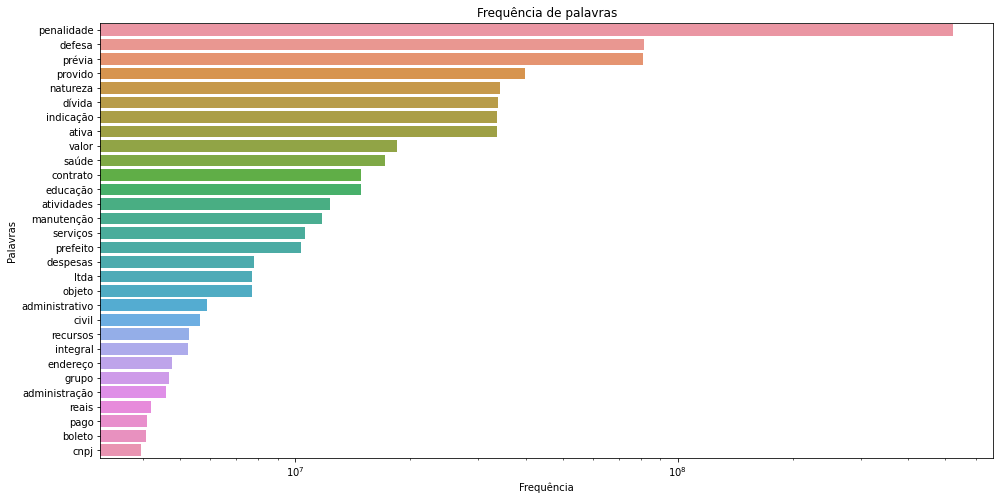

In [38]:
plt.figure(figsize=(16,8))

sns.barplot(x='Frequência', y='Palavras', data=freq_words_sorted[:30])

plt.title('Frequência de palavras')
plt.xscale('log')

plt.savefig(local_dir + '/Frequência de palavras')

In [30]:
freq_buscas_dict = {}

for k in ds.keys():
    freq_buscas_dict[k] = len(ds[k].key_terms)

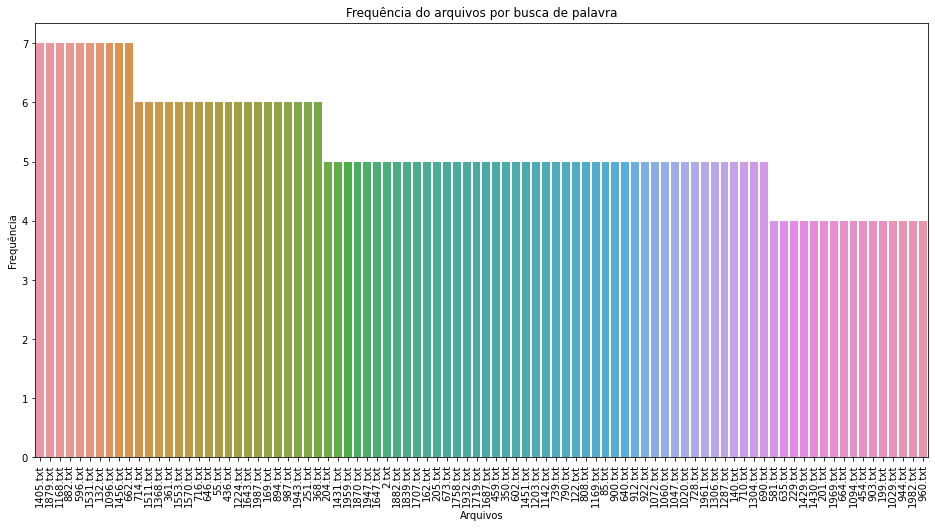

In [31]:
freq_buscas = pd.DataFrame([freq_buscas_dict.keys(), freq_buscas_dict.values()], index=['Arquivos', 'Frequência']).T.sort_values(by='Frequência', ascending=False)

plt.figure(figsize=(16,8))

sns.barplot(x='Arquivos', y='Frequência', data=freq_buscas[:90])

plt.title('Frequência do arquivos por busca de palavra')
plt.xticks(rotation=90)

plt.show()

In [32]:
freq_buscas['Frequência'].describe()

count     1011
unique       7
top          1
freq       474
Name: Frequência, dtype: int64